<a href="https://colab.research.google.com/github/ashm212/OptimalTicTacToeAlgorithm/blob/main/TicTacToe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import pandas as pd

In [202]:
df = pd.DataFrame({'a': [1,2,3],
     'b': [1,2,3],
     'c':[1,2,3]})

In [203]:
df.head()

,a,b,c
0,1,1,1
1,2,2,2
2,3,3,3


In [204]:
df['a'] = 'a' + df['a'].astype(str)
df['b'] = 'b' + df['b'].astype(str)
df['c'] = 'c' + df['c'].astype(str)

In [205]:
!pip install networkx

In [206]:
import networkx as nx

In [208]:
#make intial solutions set
import numpy as np

# Create the NumPy array
solutions_arr = np.array([
    ['a1', 'b1', 'c1'],
    ['a2', 'b2', 'c2'],
    ['a3', 'b3', 'c3'],
    ['a1', 'a2', 'a3'],
    ['b1', 'b2', 'b3'],
    ['c1', 'c2', 'c3'],
    ['a1', 'b2', 'c3'],
    ['a3', 'b2', 'c1']
])

print(solutions_arr)



[['a1' 'b1' 'c1']
 ['a2' 'b2' 'c2']
 ['a3' 'b3' 'c3']
 ['a1' 'a2' 'a3']
 ['b1' 'b2' 'b3']
 ['c1' 'c2' 'c3']
 ['a1' 'b2' 'c3']
 ['a3' 'b2' 'c1']]


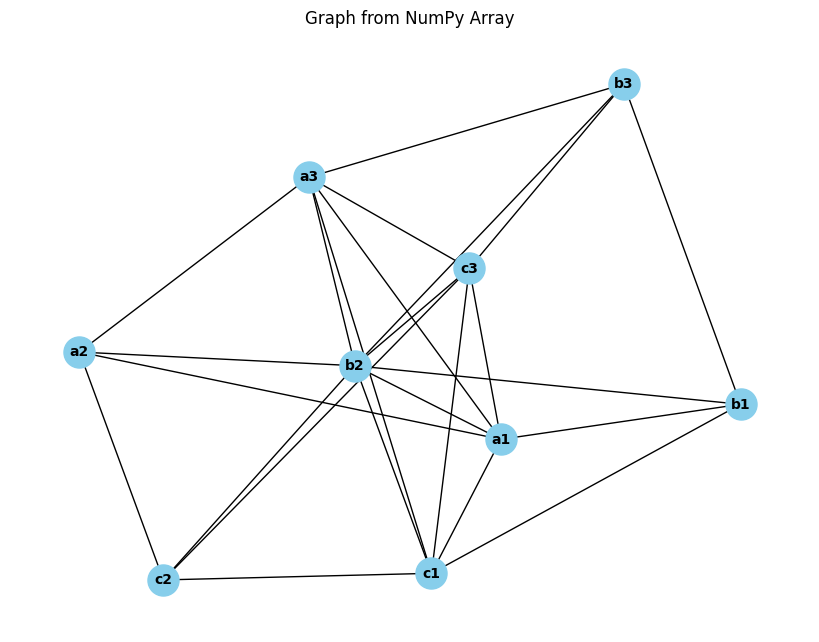

In [209]:
# Create an empty graph
graph = nx.Graph()

# Iterate through the array rows and add edges
for row in solutions_arr:
    graph.add_edge(row[0], row[1])
    graph.add_edge(row[1], row[2])
    graph.add_edge(row[2], row[0])

# Visualize the graph (optional)
import matplotlib.pyplot as plt

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=10, edge_color='black')
plt.title('Graph from NumPy Array')
plt.show()

In [210]:
# Calculate out-degree for each node
degrees = dict(graph.degree())

# Sort nodes by out-degree in descending order
sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)

print("Nodes ranked by most edges going out:")
for node in sorted_nodes:
    print(f"{node}: {degrees[node]} outgoing edges")

Nodes ranked by most edges going out:
b2: 8 outgoing edges
a1: 6 outgoing edges
c1: 6 outgoing edges
a3: 6 outgoing edges
c3: 6 outgoing edges
b1: 4 outgoing edges
a2: 4 outgoing edges
c2: 4 outgoing edges
b3: 4 outgoing edges


In [211]:
#create a list of letters that are needed on next move to block

import itertools
import numpy as np

o_moves = []  # Your list of moves

block_list = []  # Initialize an empty list to store letters forming a solution

# Generate all 2-value combinations from o_moves
two_value_combinations = list(itertools.combinations(o_moves, 2))

# Remaining letters
remaining_letters = ['a1', 'a2', 'a3', 'b1', 'b2', 'b3', 'c1', 'c2', 'c3']

# Check combinations with remaining letters against solutions_arr
for combo in two_value_combinations:
    for letter in remaining_letters:
        test_row = list(combo) + [letter]
        test_row.sort()
        test_row = np.array(test_row)
        if any((test_row == row).all() for row in solutions_arr):
            added_letters = [l for l in test_row if l not in x_moves]  # Filter out letters from x_moves
            block_list.extend(added_letters)  # Append only the added letters to the list
            print("Matching row found in solutions_arr:", test_row)

print("Letters forming solutions:", block_list)


Letters forming solutions: []


X makes a move: b2


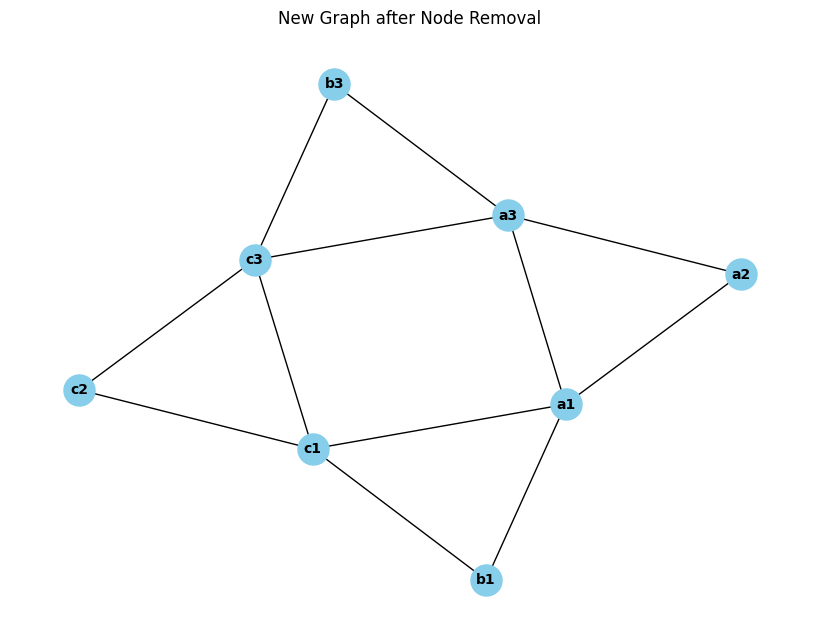

In [212]:
if block_list:
    # Use value from block_list if it's not empty
    letter_to_remove = block_list[0]  # You might want to decide which value from block_list to use
    block_list.clear()

else:
    # Prompt user for input if block_list is empty
    letter_to_remove = input("X makes a move: ")


x_moves = []
x_moves.append(letter_to_remove)

# Filter the array based on user input
o_array = solutions_arr[~np.any(solutions_arr == letter_to_remove, axis=1)]

# Create a new graph from the filtered array
new_graph = nx.Graph()

for row in o_array:
    new_graph.add_edge(row[0], row[1])
    new_graph.add_edge(row[1], row[2])
    new_graph.add_edge(row[2], row[0])

# Visualize the new graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(new_graph)
nx.draw(new_graph, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=10, edge_color='black')
plt.title('New Graph after Node Removal')
plt.show()


In [214]:
block_list

[]

In [215]:
print(o_array)

[['a1' 'b1' 'c1']
 ['a3' 'b3' 'c3']
 ['a1' 'a2' 'a3']
 ['c1' 'c2' 'c3']]


In [216]:
# Calculate out-degree for each node in the new graph
out_degrees = dict(new_graph.degree())

# Sort nodes by out-degree in descending order
sorted_nodes = sorted(out_degrees, key=out_degrees.get, reverse=True)

# Print nodes ranked by most edges going out
print("Nodes ranked by most edges going out:")
for node in sorted_nodes:
    print(f"{node}: {out_degrees[node]} outgoing edges")

Nodes ranked by most edges going out:
a1: 4 outgoing edges
c1: 4 outgoing edges
a3: 4 outgoing edges
c3: 4 outgoing edges
b1: 2 outgoing edges
b3: 2 outgoing edges
a2: 2 outgoing edges
c2: 2 outgoing edges


In [217]:
import itertools
import numpy as np

block_list = []  # Initialize an empty list to store letters forming a solution

# Generate all 2-value combinations from o_moves
two_value_combinations = list(itertools.combinations(x_moves, 2))

# Remaining letters
remaining_letters = list(set(remaining_letters) - set(x_moves) - set(o_moves))

print(remaining_letters)

['b1', 'c3', 'a1', 'c1', 'c2', 'b3', 'a2', 'a3']


In [218]:
# Check combinations with remaining letters against solutions_arr
for combo in two_value_combinations:
    for letter in remaining_letters:
        test_row = list(combo) + [letter]
        test_row.sort()
        test_row = np.array(test_row)
        if any((test_row == row).all() for row in solutions_arr):
            added_letters = [l for l in test_row if l not in o_moves]  # Filter out letters
            block_list.extend(added_letters)  # Append only the added letters to the list
            print("Matching row found in solutions_arr:", test_row)

print("Letters forming solutions:", block_list)

Letters forming solutions: []


O makes a move: a1


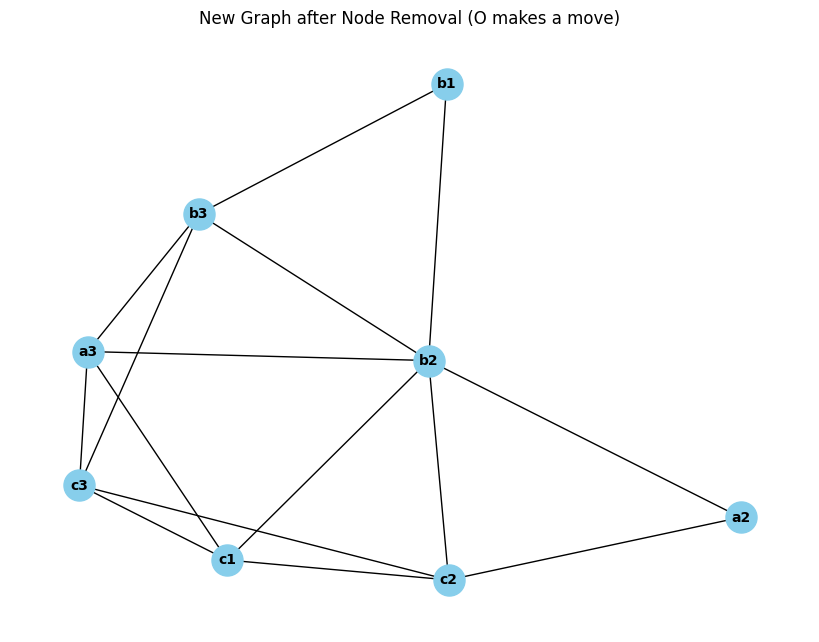

In [219]:
if block_list:
    # Use value from block_list if it's not empty
    letter_to_remove = block_list[0]  # You might want to decide which value from block_list to use
    block_list.clear()
else:
    # Prompt user for input if block_list is empty
    letter_to_remove = input("O makes a move: ")

o_moves.append(letter_to_remove)

# Filter the original array based on user input
x_array = solutions_arr[~np.any(solutions_arr == letter_to_remove, axis=1)]

# Create a new graph from the filtered 'x_array'
new_graph_x = nx.Graph()

for row in x_array:
    new_graph_x.add_edge(row[0], row[1])
    new_graph_x.add_edge(row[1], row[2])
    new_graph_x.add_edge(row[2], row[0])

# Visualize the new graph based on 'x_array'
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(new_graph_x)
nx.draw(new_graph_x, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=10, edge_color='black')
plt.title('New Graph after Node Removal (O makes a move)')
plt.show()

In [220]:
o_moves

['a1']

In [221]:
x_moves

['b2']

In [222]:
o_array

array([['a1', 'b1', 'c1'],
       ['a3', 'b3', 'c3'],
       ['a1', 'a2', 'a3'],
       ['c1', 'c2', 'c3']], dtype='<U2')

In [223]:
x_array

array([['a2', 'b2', 'c2'],
       ['a3', 'b3', 'c3'],
       ['b1', 'b2', 'b3'],
       ['c1', 'c2', 'c3'],
       ['a3', 'b2', 'c1']], dtype='<U2')

In [224]:
# Calculate out-degree for each node in the new graph
out_degrees_x = dict(new_graph_x.degree())

# Sort nodes by out-degree in descending order
sorted_nodes_x = sorted(out_degrees_x, key=out_degrees_x.get, reverse=True)

# Print nodes ranked by most edges going out in 'x_array'
print("Nodes ranked by most edges going out in 'x_array':")
for node in sorted_nodes_x:
    print(f"{node}: {out_degrees_x[node]} outgoing edges")

Nodes ranked by most edges going out in 'x_array':
b2: 6 outgoing edges
c2: 4 outgoing edges
a3: 4 outgoing edges
b3: 4 outgoing edges
c3: 4 outgoing edges
c1: 4 outgoing edges
a2: 2 outgoing edges
b1: 2 outgoing edges


In [226]:
import itertools
import numpy as np

block_list = []  # Initialize an empty list to store letters forming a solution

# Generate all 2-value combinations from o_moves
two_value_combinations = list(itertools.combinations(o_moves, 2))

# Remaining letters
remaining_letters = list(set(remaining_letters) - set(x_moves) - set(o_moves))

# Check combinations with remaining letters against solutions_arr
for combo in two_value_combinations:
    for letter in remaining_letters:
        test_row = list(combo) + [letter]
        test_row.sort()
        test_row = np.array(test_row)
        if any((test_row == row).all() for row in solutions_arr):
            added_letters = [l for l in test_row if l not in x_moves]  # Filter out letters from x_moves
            block_list.extend(added_letters)  # Append only the added letters to the list
            print("Matching row found in solutions_arr:", test_row)

print("Letters forming solutions:", block_list)

Letters forming solutions: []


In [227]:
print(remaining_letters)

['b1', 'c3', 'c1', 'c2', 'b3', 'a2', 'a3']


X makes a move: c2


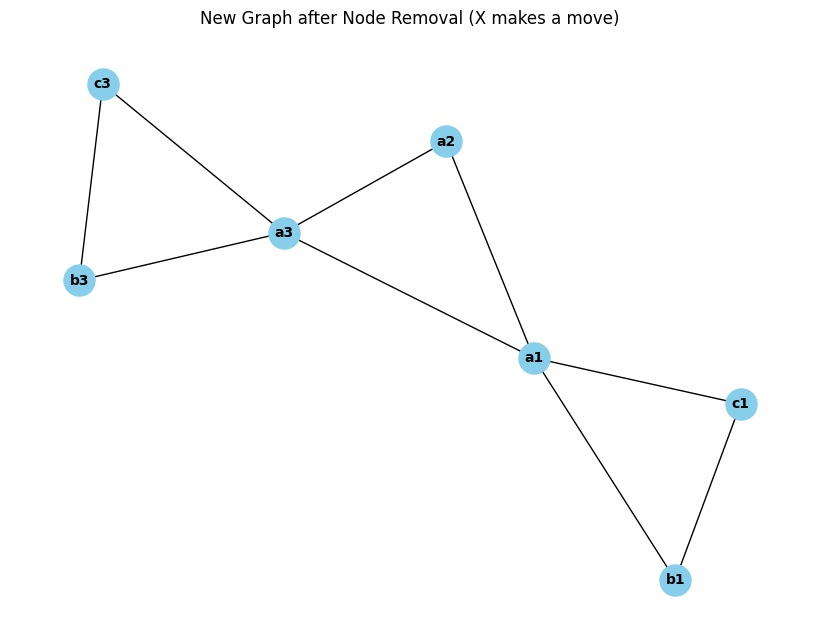

In [228]:
# Get user input for 'X makes a move'
letter_to_remove_x = input("X makes a move: ")
x_moves.append(letter_to_remove_x)

# Filter 'o_array' based on user input
o_array = o_array[~np.any(o_array == letter_to_remove_x, axis=1)]

# Create a new graph from the updated 'o_array'
new_graph_o = nx.Graph()

for row in o_array:
    new_graph_o.add_edge(row[0], row[1])
    new_graph_o.add_edge(row[1], row[2])
    new_graph_o.add_edge(row[2], row[0])

# Visualize the new graph based on the updated 'o_array'
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(new_graph_o)
nx.draw(new_graph_o, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=10, edge_color='black')
plt.title('New Graph after Node Removal (X makes a move)')
plt.show()

In [229]:
x_moves

['b2', 'c2']

In [230]:
o_moves

['a1']

In [231]:
print(o_array)

[['a1' 'b1' 'c1']
 ['a3' 'b3' 'c3']
 ['a1' 'a2' 'a3']]


In [232]:
# Assuming 'new_graph_o' is the NetworkX graph you've created

# Calculate the number of edges for each node
node_edges = [(node, len(new_graph_o.edges(node))) for node in new_graph_o.nodes()]

# Sort nodes based on the number of edges in descending order
sorted_nodes_with_edges = sorted(node_edges, key=lambda x: x[1], reverse=True)

# Printing nodes and their corresponding edge counts
for node, edge_count in sorted_nodes_with_edges:
    print(f"Node: {node}, Number of Edges: {edge_count}")


Node: a1, Number of Edges: 4
Node: a3, Number of Edges: 4
Node: b1, Number of Edges: 2
Node: c1, Number of Edges: 2
Node: b3, Number of Edges: 2
Node: c3, Number of Edges: 2
Node: a2, Number of Edges: 2


In [233]:
import itertools
import numpy as np

block_list = []  # Initialize an empty list to store letters forming a solution

# Generate all 2-value combinations from o_moves
two_value_combinations = list(itertools.combinations(x_moves, 2))

# Remaining letters
remaining_letters = list(set(remaining_letters) - set(x_moves) - set(o_moves))

print(remaining_letters)

['b1', 'c3', 'c1', 'b3', 'a2', 'a3']


In [236]:
block_list

[]

In [234]:
x_moves


['b2', 'c2']

In [235]:
o_moves

['a1']

In [237]:
# Check combinations with remaining letters against solutions_arr
for combo in two_value_combinations:
    for letter in remaining_letters:
        test_row = list(combo) + [letter]
        test_row.sort()
        test_row = np.array(test_row)
        if any((test_row == row).all() for row in solutions_arr):
            added_letters = [l for l in test_row if l not in o_moves]  # Filter out letters from o_moves
            block_list.append(added_letters[0])  # Append only the single letter to the list
            print("Matching row found in solutions_arr:", test_row)

print("Letters forming solutions:", block_list[-1])


Matching row found in solutions_arr: ['a2' 'b2' 'c2']
Letters forming solutions: a2


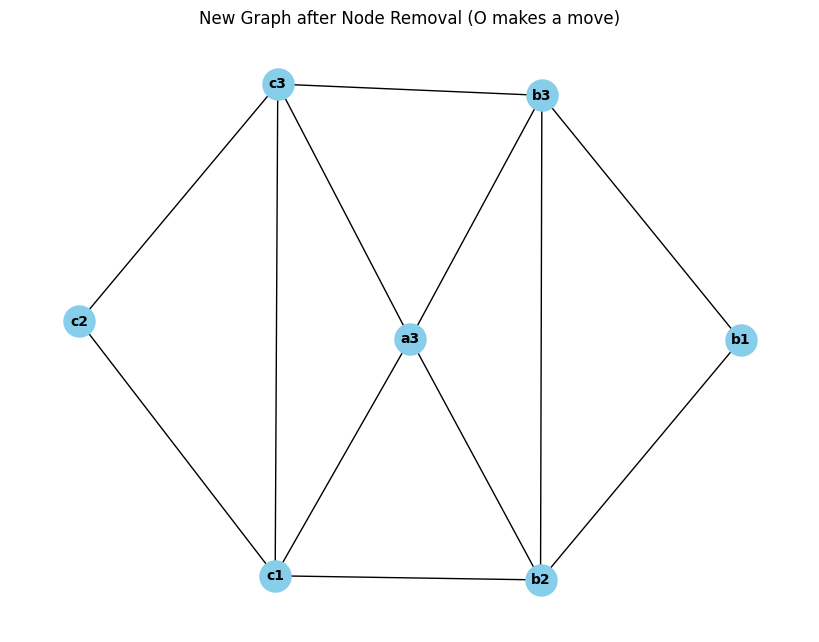

In [238]:
if block_list:
    # Use value from block_list if it's not empty
    letter_to_remove = block_list[-1]  # You might want to decide which value from block_list to use
    block_list.clear()
else:
    # Prompt user for input if block_list is empty
    letter_to_remove = input("O makes a move 1: ")

o_moves.append(letter_to_remove)

# Filter the original array based on user input
x_array = x_array[~np.any(x_array == letter_to_remove, axis=1)]

# Create a new graph from the filtered 'x_array'
new_graph_x = nx.Graph()

for row in x_array:
    new_graph_x.add_edge(row[0], row[1])
    new_graph_x.add_edge(row[1], row[2])
    new_graph_x.add_edge(row[2], row[0])

# Visualize the new graph based on 'x_array'
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(new_graph_x)
nx.draw(new_graph_x, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=10, edge_color='black')
plt.title('New Graph after Node Removal (O makes a move)')
plt.show()

In [239]:
x_array

array([['a3', 'b3', 'c3'],
       ['b1', 'b2', 'b3'],
       ['c1', 'c2', 'c3'],
       ['a3', 'b2', 'c1']], dtype='<U2')

In [240]:
o_array

array([['a1', 'b1', 'c1'],
       ['a3', 'b3', 'c3'],
       ['a1', 'a2', 'a3']], dtype='<U2')

In [241]:
print(x_moves)
print(o_moves)


['b2', 'c2']
['a1', 'a2']


In [242]:
# Calculate out-degree for each node in the new graph
out_degrees_x = dict(new_graph_x.degree())

# Sort nodes by out-degree in descending order
sorted_nodes_x = sorted(out_degrees_x, key=out_degrees_x.get, reverse=True)

# Print nodes ranked by most edges going out in 'x_array'
print("Nodes ranked by most edges going out in 'x_array':")
for node in sorted_nodes_x:
    print(f"{node}: {out_degrees_x[node]} outgoing edges")

Nodes ranked by most edges going out in 'x_array':
a3: 4 outgoing edges
b3: 4 outgoing edges
c3: 4 outgoing edges
b2: 4 outgoing edges
c1: 4 outgoing edges
b1: 2 outgoing edges
c2: 2 outgoing edges


In [243]:
x_moves

['b2', 'c2']

In [244]:
o_moves

['a1', 'a2']

In [245]:
x_array

array([['a3', 'b3', 'c3'],
       ['b1', 'b2', 'b3'],
       ['c1', 'c2', 'c3'],
       ['a3', 'b2', 'c1']], dtype='<U2')

In [246]:
o_array

array([['a1', 'b1', 'c1'],
       ['a3', 'b3', 'c3'],
       ['a1', 'a2', 'a3']], dtype='<U2')

In [247]:
import itertools
import numpy as np

block_list = []  # Initialize an empty list to store letters forming a solution

# Generate all 2-value combinations from o_moves
two_value_combinations = list(itertools.combinations(o_moves, 2))

# Remaining letters
remaining_letters = list(set(remaining_letters) - set(x_moves) - set(o_moves))

# Check combinations with remaining letters against solutions_arr
for combo in two_value_combinations:
    for letter in remaining_letters:
        test_row = list(combo) + [letter]
        test_row.sort()
        test_row = np.array(test_row)
        if any((test_row == row).all() for row in solutions_arr):
            added_letters = [l for l in test_row if l not in x_moves]  # Filter out letters from
            block_list.extend(added_letters)  # Append only the added letters to the list
            print("Matching row found in solutions_arr:", test_row)

print("Letters forming solutions:", block_list[-1])

Matching row found in solutions_arr: ['a1' 'a2' 'a3']
Letters forming solutions: a3


In [248]:
o_array

array([['a1', 'b1', 'c1'],
       ['a3', 'b3', 'c3'],
       ['a1', 'a2', 'a3']], dtype='<U2')

In [249]:
block_list

['a1', 'a2', 'a3']

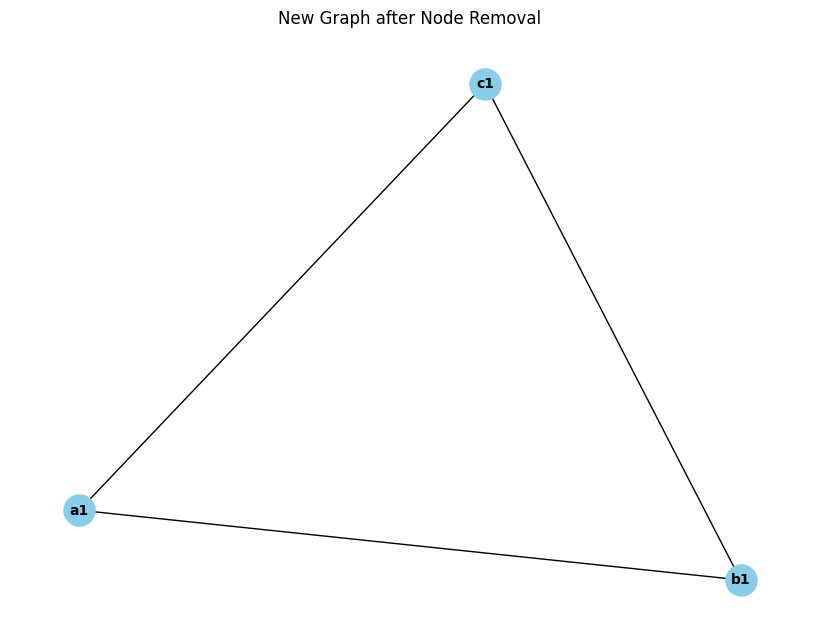

In [250]:
if block_list:
    # Use value from block_list if it's not empty
    letter_to_remove = block_list[-1]  # You might want to decide which value from block_list to use
    block_list.clear()

else:
    # Prompt user for input if block_list is empty
    letter_to_remove = input("X makes a move: ")

x_moves.append(letter_to_remove)

# Filter the array based on user input
o_array = o_array[~np.any(o_array == letter_to_remove, axis=1)]

# Create a new graph from the filtered array
new_graph = nx.Graph()

for row in o_array:
    new_graph.add_edge(row[0], row[1])
    new_graph.add_edge(row[1], row[2])
    new_graph.add_edge(row[2], row[0])

# Visualize the new graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(new_graph)
nx.draw(new_graph, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=10, edge_color='black')
plt.title('New Graph after Node Removal')
plt.show()


In [251]:
letter_to_remove

'a3'

In [252]:
o_array

array([['a1', 'b1', 'c1']], dtype='<U2')

In [253]:
o_moves

['a1', 'a2']

In [254]:
x_moves

['b2', 'c2', 'a3']

In [255]:
# Assuming 'new_graph_o' is the NetworkX graph you've created

# Calculate the number of edges for each node
node_edges = [(node, len(new_graph.edges(node))) for node in new_graph.nodes()]

# Sort nodes based on the number of edges in descending order
sorted_nodes_with_edges = sorted(node_edges, key=lambda x: x[1], reverse=True)

# Printing nodes and their corresponding edge counts
for node, edge_count in sorted_nodes_with_edges:
    print(f"Node: {node}, Number of Edges: {edge_count}")

Node: a1, Number of Edges: 2
Node: b1, Number of Edges: 2
Node: c1, Number of Edges: 2


In [256]:
print(x_moves)
print(o_moves)

['b2', 'c2', 'a3']
['a1', 'a2']


In [257]:
import itertools
import numpy as np

block_list = []  # Initialize an empty list to store letters forming a solution

# Generate all 2-value combinations from opposite moves
two_value_combinations = list(itertools.combinations(x_moves, 2))

# Remaining letters
remaining_letters = list(set(remaining_letters) - set(x_moves) - set(o_moves))

print(remaining_letters)

['b1', 'b3', 'c1', 'c3']


In [258]:
o_moves

['a1', 'a2']

In [259]:
# Check combinations with remaining letters against solutions_arr
for combo in two_value_combinations:
    for letter in remaining_letters:
        test_row = list(combo) + [letter]
        test_row.sort()
        test_row = np.array(test_row)
        if any((test_row == row).all() for row in solutions_arr):
            added_letters = [l for l in test_row if l not in x_moves]  # Filter out letters
            block_list.append(added_letters[0])  # Append only the single letter to the list
            print("Matching row found in solutions_arr:", test_row)

print("Letters forming solutions:", block_list[-1])


Matching row found in solutions_arr: ['a3' 'b2' 'c1']
Letters forming solutions: c1


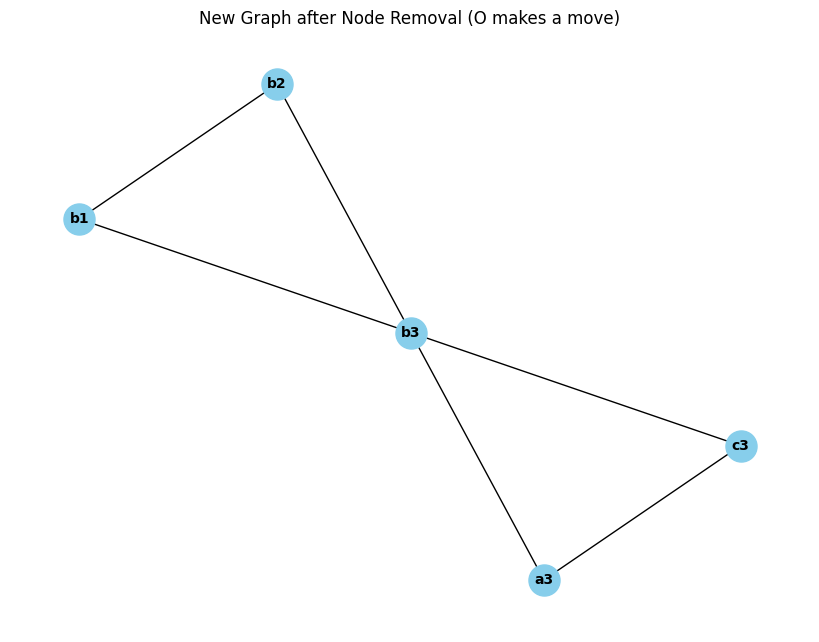

In [260]:
if block_list:
    # Use value from block_list if it's not empty
    letter_to_remove = block_list[-1]  # You might want to decide which value from block_list to use
    block_list.clear()
else:
    # Prompt user for input if block_list is empty
    letter_to_remove = input("O makes a move: ")

o_moves.append(letter_to_remove)

# Filter the original array based on user input
x_array = x_array[~np.any(x_array == letter_to_remove, axis=1)]

# Create a new graph from the filtered 'x_array'
new_graph_x = nx.Graph()

for row in x_array:
    new_graph_x.add_edge(row[0], row[1])
    new_graph_x.add_edge(row[1], row[2])
    new_graph_x.add_edge(row[2], row[0])

# Visualize the new graph based on 'x_array'
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(new_graph_x)
nx.draw(new_graph_x, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=10, edge_color='black')
plt.title('New Graph after Node Removal (O makes a move)')
plt.show()

In [261]:
x_array

array([['a3', 'b3', 'c3'],
       ['b1', 'b2', 'b3']], dtype='<U2')